In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml

In [2]:
mnist = datasets.fetch_openml("mnist_784")

Jumlah data setiap label:
Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


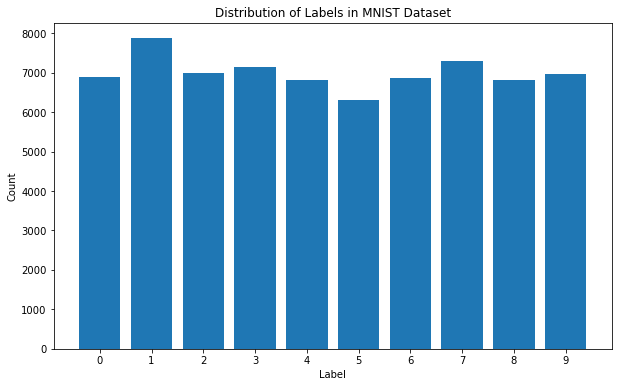

In [3]:
# 1. Eksplorasi Dataset
labels, counts = np.unique(mnist.target, return_counts=True)
print("Jumlah data setiap label:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} data")

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, tick_label=labels)

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in MNIST Dataset')

# Show the plot
plt.show()

In [4]:
import pandas as pd

# Data kelas Anda dalam bentuk dictionary
data = {
    'Label': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Jumlah Data': [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung total jumlah data
total_data = df['Jumlah Data'].sum()

# Menambahkan kolom "Persentase" yang berisi persentase distribusi
df['Persentase'] = (df['Jumlah Data'] / total_data) * 100

# Menampilkan DataFrame
print(df)

   Label  Jumlah Data  Persentase
0      0         6903    9.861429
1      1         7877   11.252857
2      2         6990    9.985714
3      3         7141   10.201429
4      4         6824    9.748571
5      5         6313    9.018571
6      6         6876    9.822857
7      7         7293   10.418571
8      8         6825    9.750000
9      9         6958    9.940000


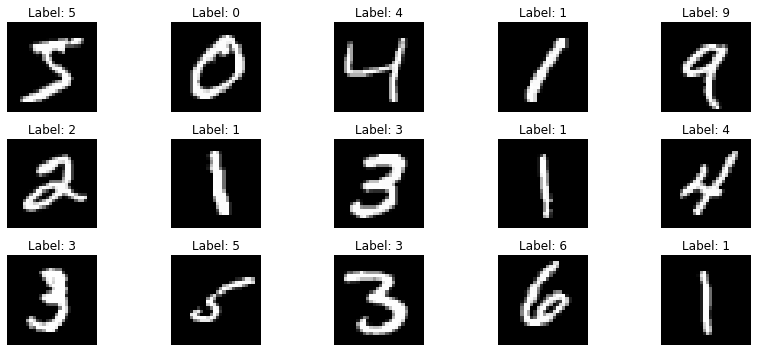

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Klasifikasi Menggunakan Algoritma SVM

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

## Split Dataset menjadi 80:20

In [7]:
# pemisahan data training dan data testing dengan 80:20

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2, random_state=42)

## Mencari hyperparameter yang terbaik untuk menghasilkan kinerja model yang optimal

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1], 
              'svc__gamma': [0.001]}
grid = GridSearchCV(model, param_grid) #mengombinasikan parameter dalam param_grid untuk model yg telah dibuat "model"

%time grid.fit(Xtrain, ytrain) #melatih model menggunakan GridSearchCV untuk melakukan kombinasi semua parameter dalam param_grid dgn menggunakan data pelatihan 'X_train' dan data label 'y_train'
print(grid.best_params_) #mencetak kombinasi hiperparameter terbaik
print(grid.best_score_) #mencetak skor 

Wall time: 22min 17s
{'svc__C': 1, 'svc__gamma': 0.001}
0.9462857142857143


In [9]:
model = grid.best_estimator_ #mengambil model terbaik dari hasil penelusuran hiperparameter
yfit = model.predict(Xtest) #membuat prediksi pada data uji 'X_test'

## Evaluasi Model

In [10]:
from sklearn.metrics import classification_report

target_names = [str(i) for i in range(10)]
print(classification_report(ytest, yfit, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.97      0.98      0.97      1600
           2       0.94      0.94      0.94      1380
           3       0.94      0.93      0.93      1433
           4       0.92      0.95      0.93      1295
           5       0.93      0.94      0.94      1273
           6       0.97      0.97      0.97      1396
           7       0.95      0.95      0.95      1503
           8       0.95      0.94      0.95      1357
           9       0.93      0.92      0.93      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



Text(91.68, 0.5, 'predicted label')

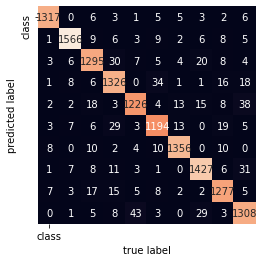

In [11]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Pelabelan Citra Data Testing

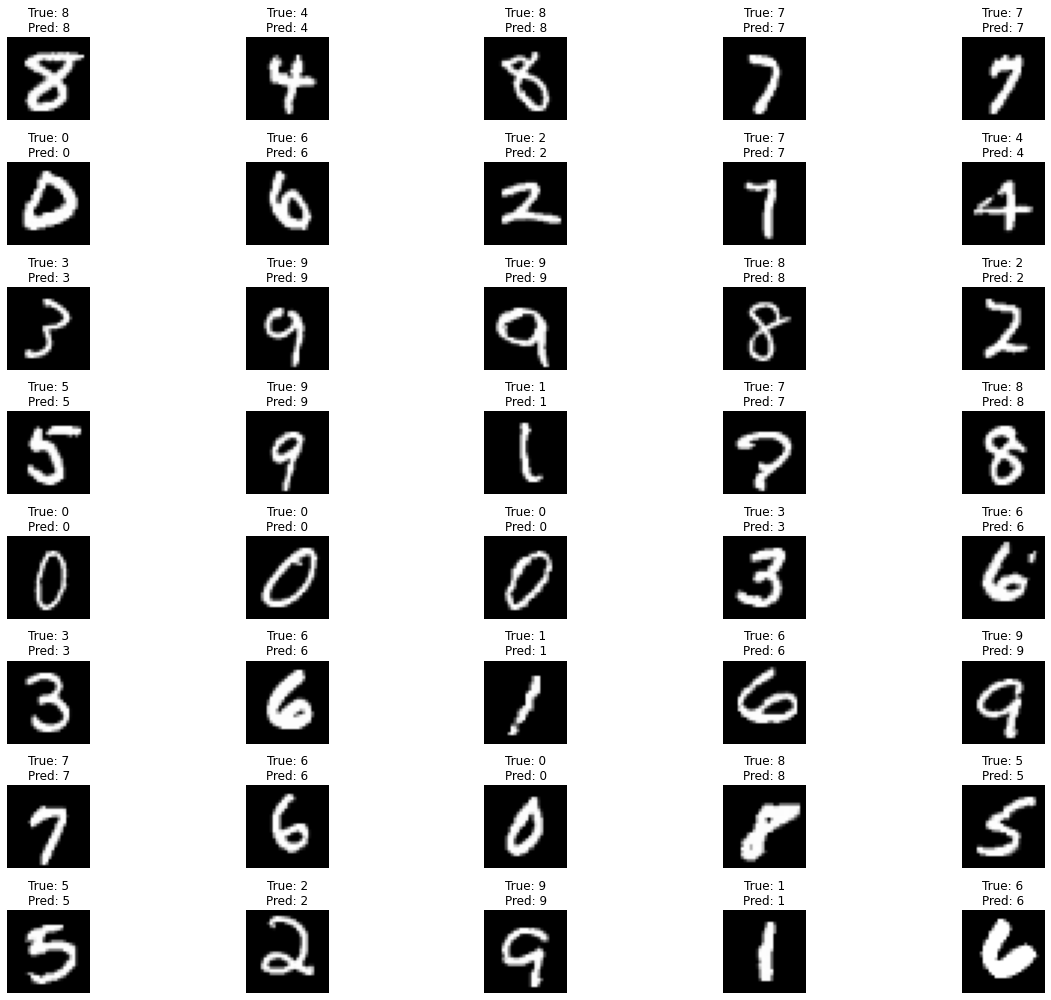

In [16]:
n_samples_to_display = 40
# Display images with true labels and predicted labels
plt.figure(figsize=(18, 14))
for i in range(n_samples_to_display):
    plt.subplot(8, 5, i + 1)
    plt.imshow(Xtest[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = ytest.iloc[i] if isinstance(ytest, pd.Series) else ytest[i]
    pred_label = yfit.iloc[i] if isinstance(yfit, pd.Series) else yfit[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()